In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

In [2]:
df_pre=pd.read_parquet('accident_vehicle_preprocessed.parquet')
df_pre.head()

,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,...,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland,Hour,Day,Month,Age_of_Driver
0,3.000000,0,5.268217,8268.00000,1,6,93,8118,5,1,...,0,30,1,1,2005,0,17,5,1,45.0
1,5.000000,3,3.000000,8300.00000,1,8,93,8118,5,1,...,3,30,1,1,2005,0,0,6,1,35.0
2,10.000000,0,5.268217,85.00000,2,8,140,8118,8,1,...,3,30,1,1,2005,0,21,10,1,55.0
3,6.402357,0,5.268217,2142.73833,2,0,15,3699,0,1,...,3,30,1,1,2005,0,20,13,1,35.0
4,4.000000,3,6.000000,4266.00000,2,0,240,12714,8,1,...,3,30,1,1,2005,0,20,13,1,45.0


In [3]:
df=df_pre[df_pre['Accident_Severity']>0]
df['Accident_Severity'].value_counts()

1    59062
2     6695
Name: Accident_Severity, dtype: int64

In [4]:
df2=df.copy()

In [5]:
#identify dependent and independent variables
X=df2.drop('Accident_Severity', axis=1)
y=df2.Accident_Severity

# Emphasize the Minority Class

In [17]:
from sklearn.utils.class_weight import compute_class_weight
classes=np.unique(y)
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=classes, 
                                     y=y)


In [18]:
class_weights = dict(zip(np.unique(y), class_weights))
class_weights

{1: 0.5566777284887068, 2: 4.9109036594473485}

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=11)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100,class_weight=class_weights) 
 


ACCURACY OF THE MODEL:  0.9071624087591241


C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


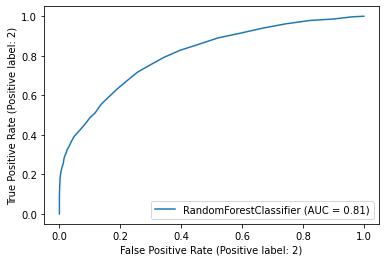

In [21]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

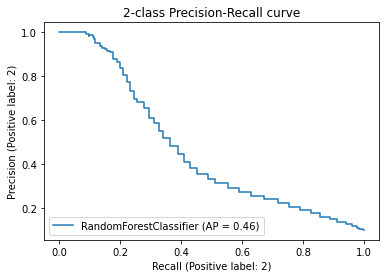

In [22]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="RandomForestClassifier"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11802     1]
 [ 1220   129]]
              precision    recall  f1-score   support

           1       0.91      1.00      0.95     11803
           2       0.99      0.10      0.17      1349

    accuracy                           0.91     13152
   macro avg       0.95      0.55      0.56     13152
weighted avg       0.92      0.91      0.87     13152

